# Lab 6: Modeling and Estimation

** If you are not attending lab, this assignment is due 10/03/2017 at 11:59pm (graded on accuracy) **

** If you are attending lab, you do not need to submit the assignment; you just need to get checked off by your TA. **

In this lab we will work through the process of:
1. implementing a basic model, defining loss functions, 
1. minimizing loss functions using numeric libraries, and 
1. finally bootstrap sampling to understand the variability in the parameter estimates.

This lab will continue using the toy tip calculation dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(42)
plt.style.use('fivethirtyeight')
sns.set()
sns.set_context("talk")
%matplotlib inline

In [2]:
# These lines load the tests.
# !pip install -U okpy

from IPython.display import display, Latex, Markdown
from client.api.notebook import Notebook
ok = Notebook('lab06.ok')

Assignment: Lab 06
OK, version v1.12.10



In [3]:
# ok.auth(force=True)
ok.auth(force=False)

Successfully logged in as yining.jiang@berkeley.edu


# Loading the Tips Dataset

To begin with, we load the tips dataset from the `seaborn` library.  The tips data contains records of tips, total bill, and information about the person who paid the bill.

In [3]:
data = sns.load_dataset("tips")

print("Number of Records:", len(data))
data.head()

Number of Records: 244


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [9]:
daca=data.head()
daca['a']=[1,2,3,4,"NULL"]
daca['a'].mean()

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


TypeError: unsupported operand type(s) for +: 'int' and 'str'

---
<br></br>

# Question 1: Defining the Model 

In lecture we modeled the percent tip.  In this lab we will instead attempt to model the tip value (in dollars) as a function of the total bill.  As a consequence we define the following mathematical model:

$$\Large
\texttt{Tip} = \theta^*  \times \texttt{TotalBill}
$$

This follows the similar intuition that tips are some **unknown** percentage of the total bill.  We will then try to estimate the slope of this relationship which corresponds to the percent tip.

Here the parameter $\theta^*$ represents the true percent tip that we would like to estimate.  

**Implement the python function for this model (yes this is very easy):**


In [5]:
def model(theta, total_bill):
    """
    Takes the parameter theta and the total bill returns the computed tip.
    """
    return theta*total_bill

In [6]:
_ = ok.grade('q01a')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'lab06.ipynb'.
Backup... 100% complete
Backup successful for user: yining.jiang@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/lab06/backups/31NzyQ
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



---
<br/><br/><br/>

# Loss Functions

In class we covered a range of different loss functions.  In this lab we will implement the squared loss and the absolute loss functions.  
Suppose for a given total bill $x$ we observe a tip value of $y$ and our model predicts:
$$\Large
% the \hspace{0pt} is added to address a bug in safari mathjax
\hat{\hspace{0pt}y} = \theta * x
$$ 
then any of the following might be appropriate **loss functions**

1. **Squared Loss** (also known as the $L^2$ loss pronounced "ell-two"):
$$\Large
% the \hspace{0pt} is added to address a bug in safari mathjax
L\left(y, \hat{\hspace{0pt}y} \right) = \left( y - \hat{\hspace{0pt}y} \right)^2
$$
1. **Absolute Loss** (also known as the $L^1$ loss pronounced "ell-one"):
$$\Large
% the \hspace{0pt} is added to address a bug in safari mathjax
L\left(y, \hat{\hspace{0pt}y} \right) = \left| y - \hat{\hspace{0pt}y} \right|
$$

---
<br></br>
In this question, you are going to define functions for **squared loss** and **absolute loss**. 

## Question 2a: 

Implement the squared loss function:
$$\Large
L\left(y, \hat{\hspace{0pt}y} \right) = \left( y - \hat{\hspace{0pt}y} \right)^2
$$

In [7]:
def squared_loss(y_obs, y_hat):
    """
    y_obs: an array of observed valued
    y_hat: an array of predicted values
    return an array corresponding to the loss for each prediction
    """
    return (y_obs-y_hat)**2
    

In [8]:
_ = ok.grade('q02a')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'lab06.ipynb'.
Backup... 100% complete
Backup successful for user: yining.jiang@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/lab06/backups/L9Ejv4
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



## Question 2b:

Suppose you observe $y=3.00$ and $x=28.00$ using the `model` and `squared_loss` function defined above plot the loss for a range of $\theta$ values:

In [9]:
y = np.array([3.00])
x = np.array([28.00])
thetas = np.linspace(0, 0.3, 200) # A range of theta values:

In [26]:
## Finish this by replacing 0.0 with the correct calculation 
## Hint 1: You will use squared_loss y, model, theta and x
## Hint 2: You might need to extract a single value from an array (or take the mean)
loss = np.array([squared_loss(model(theta, 28), 3).mean() for theta in thetas])

In [27]:
_ = ok.grade('q02b')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'lab06.ipynb'.
Backup... 100% complete
Backup successful for user: yining.jiang@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/lab06/backups/NkJVRN
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



The following should produce this picture:

![loss_curve.png](squared_loss.png)

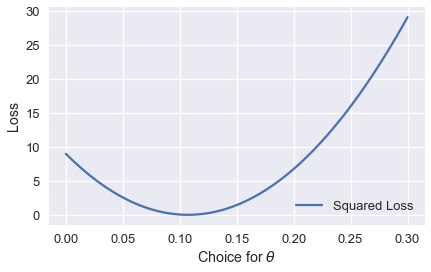

In [12]:
plt.plot(thetas, loss, label="Squared Loss")
plt.xlabel(r"Choice for $\theta$")
plt.ylabel(r"Loss")
plt.legend(loc=4)
plt.savefig("squared_loss_my_plot.png",  bbox_inches = 'tight')

## Question 2c:
Implement the absolute loss 
$$\Large
L\left(y, \hat{\hspace{0pt}y} \right) = \left| y - \hat{\hspace{0pt}y} \right|
$$

In [14]:
def abs_loss(y_obs, y_hat):
    """
    y_obs: an array of observed valued
    y_hat: an array of predicted values
    return an array corresponding to the loss for each prediction
    """
    return abs(y_obs-y_hat)

In [15]:
_ = ok.grade('q02c')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'lab06.ipynb'.
Backup... 100% complete
Backup successful for user: yining.jiang@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/lab06/backups/QWMoqG
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



Below is the plot of the absolute loss.  If you implemented things correctly it should look like:

![absolute loss](absolute_loss.png)


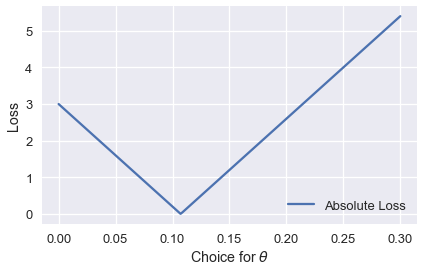

In [16]:
y = np.array([3.00])
x = np.array([28.00])
thetas = np.linspace(0, 0.3, 200) 

# Code provided for you this time. (your welcome)
loss = np.array([abs_loss(y, model(theta,x)).mean() for theta in thetas])

plt.plot(thetas, loss, label="Absolute Loss")
plt.xlabel(r"Choice for $\theta$")
plt.ylabel(r"Loss")
plt.legend(loc=4)
plt.savefig("absolute_loss_my_plot.png",  bbox_inches = 'tight')


## Question 2d: Plotting **Average Loss** for our Data

We can extend the above loss functions to an entire dataset by taking the average. Let the dataset $\mathcal{D}$ be the set of observations:

$$\Large
\mathcal{D} = \{(x_1, y_1), \ldots, (x_n, y_n)\}
$$

where $x_i$ is the total bill and $y_i$ is the tip dollar amount.

We can define the average loss over the dataset as:

$$\Large
L\left(\theta, \mathcal{D}\right) = \frac{1}{n} \sum_{i=1}^n L(m_\theta(x_i), y_i) = \frac{1}{n} \sum_{i=1}^n L(\theta *  x_i, y_i)
$$

where $m_\theta(x_i) = \theta * x_i$ is the model evaluated using the parameters $\theta$ on the bill amount $x_i$.

**Complete the following code block to render a plot of the average absolute and squared loss for different values of $\theta$**

In [24]:
thetas = np.linspace(0, 0.3, 200) # A range of theta values:
y = data['tip']
x = data['total_bill']

# Replace 0.0 with the correct value computed 
# using the model and loss functions from above
avg_squared_loss = np.array([squared_loss(model(theta, x), y).mean()for theta in thetas])
avg_absolute_loss = np.array([abs_loss(y, model(theta,x)).mean() for theta in thetas])

If done correctly the following plot should look like:

![Average Loss](average_loss.png)

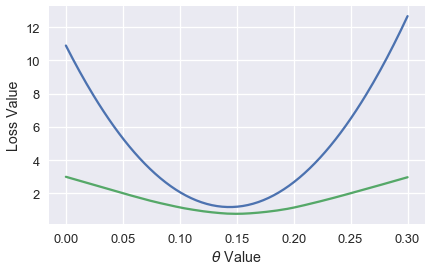

In [25]:
plt.plot(thetas, avg_squared_loss, label = "Average Squared Loss")
plt.plot(thetas, avg_absolute_loss, label = "Average Absolute Loss")
plt.xlabel(r"$\theta$ Value")
plt.ylabel("Loss Value")
plt.savefig("average_loss_my_plot.png",  bbox_inches = 'tight')

---
<br/><br/><br/> 

# Question 3: Minimizing The Loss

In some cases, it is possible to use calculus to analytically compute the parameters $\theta$ that minimize the loss function.  However, in this lab we will use computational techniques to minimize the loss.  Here we will use the [`scipy.optimize.minimize`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) routine to minimize the average loss.

Complete the following python function:

In [28]:
from scipy.optimize import minimize

def minimize_average_loss(loss_function, model, x, y):
    """
    loss_function: either the squared or absolute loss functions from above.
    model: the model (as defined above)
    x: the x values (total bills)
    y: the y values (tip amounts)
    return the estimate for theta as a scalar
    
    Note we will ignore failed convergence for this lab ... 
    """
    
    ## Notes on the following function call which you need to finish:
    # 
    # 0. the ... should be replaced with the average loss evaluated on 
    #       the data x, y using the model and appropriate loss function
    # 1. x0 is the initial value for THETA.  Yes, this is confusing
    #       but optimization people like x to be the thing they are 
    #       optimizing.
    # 2. We extract the 'x' entry in the dictionary which corresponds
    #       to the value of theta at the optimum
    # 3. The resulting theta is actually an array with a single element
    #       therefore we grab just that element with [0]
    
    return minimize(lambda theta:loss_function(model(theta, x), y).mean(), x0=0.0)['x'][0]


In [29]:
## Should be roughly 0.1437
y = data['tip']
x = data['total_bill']
minimize_average_loss(squared_loss, model, x, y)

0.14373189229218733

In [30]:
## Should be roughly 0.1496
y = data['tip']
x = data['total_bill']
minimize_average_loss(abs_loss, model, x, y)

0.14958862353611219

In [31]:
_ = ok.grade('q03')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'lab06.ipynb'.
Backup... 100% complete
Backup successful for user: yining.jiang@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/lab06/backups/NkJNBK
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



---
<br/><br/><br/> 

# Question 4: Simulation

In this question we will use the bootstrap procedure to estimate the distribution of loss minimizing estimators.  

At a high level the bootstrap algorithm is:

```
samples = []

for i in nsamples:

    n = len(data)

    data_sample = draw sample n samples WITH REPLACEMENT from the data (both x and y)
    
    sample_theta_opt = estimate theta on data_sample
    
    samples.append( sample_theta_opt )
    

sns.distplot(samples)

```

## Question 4a 

To use `bootstrap`, we need to repeatedly draw samples. We give you the code for the bootstrap:

```python
def bootstrap(loss_function, model, x, y, nsamples=1000):
    samples = []
    for i in range(nsamples):
        samples.append(sample_theta(loss_function, model, x, y))
    return samples 
```

However, you will need to implement the `sample_theta()` function which should:

1. resample the data with replacement.
    * **hint 1:** check out [`np.random.randint`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.randint.html)
    * **hint 2:** consider something like:
        ```python
        x = np.array([1,2,3])
        y = np.array([1,2,3])
        ind = np.random.randint(0, 3, 3)
        print(x[ind], y[ind])
        ```
1. call the loss minimization routine (from above) to estimate $\theta$ on the sample



In [46]:
def sample_theta(loss_function, model, x, y):
    """
    lambda theta:theta==
    loss_function: either the squared or absolute loss function
    model: the predictive model as defined above
    x: the total bill as defined above
    y: the tip value as defined above
    returns a single theta estimate for a random resampling of the data 
    """
    n = len(x)
    ind = np.random.randint(0, n, n)
    return minimize_average_loss(loss_function, model, x[ind], y[ind])


In [47]:
np.random.randint(0,5)

2

In [48]:
def bootstrap(loss_function, model, x, y, nsamples=1000):
    samples = []
    print_mod = int(nsamples/10.0)
    for i in range(nsamples):
        if (i+1) % print_mod == 0:
            print("Generating Sample", i+1, "out of", nsamples, "samples.")
        samples.append(sample_theta(loss_function, model, x, y))
    return samples 

## Question 4b 

Using `bootstrap()` function to generate 1000 samples for **squared loss** and **absolute loss**

### Bootstrapped Squared Loss

Call the above `bootstrap` function using the `squared_loss`, `model`, `x`, and `y` for 1000 samples.  This may take up to a minute to complete.  If you are debugging your implementation you may try running fewer samples.

In [50]:
y = data['tip']
x = data['total_bill']
squared_loss_samples = bootstrap(squared_loss, model, x, y, nsamples=1000)

Generating Sample 100 out of 1000 samples.
Generating Sample 200 out of 1000 samples.
Generating Sample 300 out of 1000 samples.
Generating Sample 400 out of 1000 samples.
Generating Sample 500 out of 1000 samples.
Generating Sample 600 out of 1000 samples.
Generating Sample 700 out of 1000 samples.
Generating Sample 800 out of 1000 samples.
Generating Sample 900 out of 1000 samples.
Generating Sample 1000 out of 1000 samples.


If done correctly the following plot should **approximately** look like:

![squared_loss_samples](squared_loss_samples.png)

Sample SD: 0.00429502142168
Sample MEAN: 0.143931269481


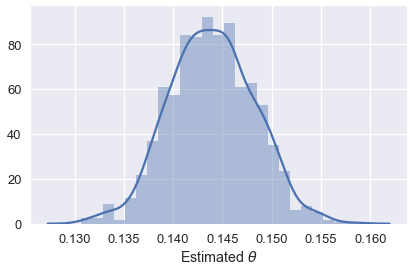

In [51]:
sns.distplot(squared_loss_samples)
plt.xlabel(r"Estimated $\theta$")
print("Sample SD:", np.std(squared_loss_samples))
print('Sample MEAN:', np.mean(squared_loss_samples))

### Bootstrapped Absolute Loss 

Call the above `bootstrap` function using the `absolute_loss`, `model`, `x`, and `y` for 1000 samples.  **This may take a few minutes to complete.**  If you are debugging your implementation you may try running fewer samples.

In [52]:
y = data['tip']
x = data['total_bill']
abs_loss_samples = bootstrap(abs_loss, model, x, y, nsamples=1000)

Generating Sample 100 out of 1000 samples.
Generating Sample 200 out of 1000 samples.
Generating Sample 300 out of 1000 samples.
Generating Sample 400 out of 1000 samples.
Generating Sample 500 out of 1000 samples.
Generating Sample 600 out of 1000 samples.
Generating Sample 700 out of 1000 samples.
Generating Sample 800 out of 1000 samples.
Generating Sample 900 out of 1000 samples.
Generating Sample 1000 out of 1000 samples.


If done correctly the following plot should **approximately** look like:

![abs_loss_samples](abs_loss_samples.png)

Sample SD: 0.00332690368381
Sample MEAN: 0.149716993032


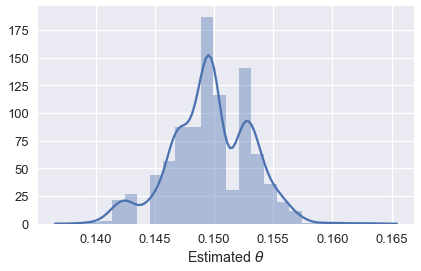

In [53]:
sns.distplot(abs_loss_samples)
plt.xlabel(r"Estimated $\theta$")
print("Sample SD:", np.std(abs_loss_samples))
print("Sample MEAN:", np.mean(abs_loss_samples))

In [54]:
_ = ok.grade('q04b')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'lab06.ipynb'.
Backup... 100% complete
Backup successful for user: yining.jiang@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/lab06/backups/mZ5lNA
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



## Question 4c:

Which loss function has lower variability and why?

In [ ]:
question4c_answer = """

"""

## Submission

Congrats! You are finished with this assignment. For convenience, we've included a cell below that runs all the OkPy tests.

In [ ]:
import os
print("Running all tests...")
_ = [ok.grade(q[:-3]) for q in os.listdir("ok_tests") if q.startswith('q')]

Now, run the cell below to submit your assignment to OkPy. The autograder should email you shortly with your autograded score. The autograder will only run once every 30 minutes.

**If you're failing tests on the autograder but pass them locally**, you should simulate the autograder by doing the following:

1. In the top menu, click Kernel -> Restart and Run all.
2. Run the cell above to run each OkPy test.

**You must make sure that you pass all the tests when running steps 1 and 2 in order.** If you are still failing autograder tests, you should double check your results.

In [ ]:
_ = ok.submit()